In [68]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [50]:
# Import embedding
embedding = pd.read_pickle('../../Data/Structure_clustering/default_his1.pkl')
# Import labels
labels = pd.read_pickle('../../Data/Supervised/regioselectivity_substratespecificity_db.pkl')

In [56]:
labels = labels.set_index('UniProt')

In [84]:
labels['Substrate specificity']

UniProt
Q4WP32                      cellulose
A0A1U8QMG7    (cellulose, xyloglucan)
Q5BCX8                      cellulose
A0A6C0PI79                  cellulose
M2RAI8                      cellulose
                       ...           
A0A2N8U5I8        (chitin, cellulose)
A0A1L9X7U6                  cellulose
A0A833WPX8           homogalacturonan
D0N2F6               homogalacturonan
D0N2F7               homogalacturonan
Name: Substrate specificity, Length: 98, dtype: object

In [82]:
y = pd.get_dummies(labels['Substrate_specificity'])


#embedding = embedding.join(y).dropna(subset = 'C1')
#y = embedding.pop('C1')

KeyError: 'Substrate_specificity'

In [64]:
X_train, X_test, y_train, y_test,  = train_test_split(embedding, y, test_size=0.25, random_state=16)

In [66]:
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

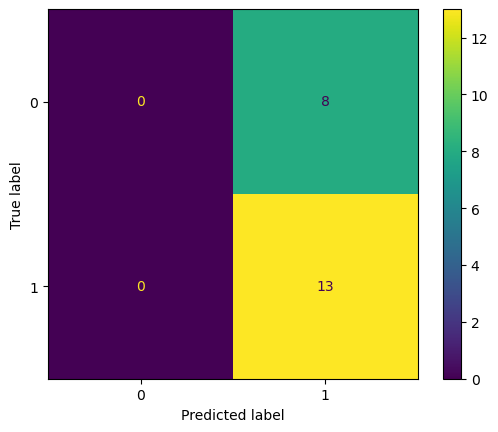

In [81]:
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(cm).plot()
